In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import os
import requests
import time
from pathlib import Path

In [2]:
# Set path to csv
home_values = Path("..\Resources\home_values.csv")
monthly_rent_cost = Path("..\Resources\monthly_rent_cost.csv")

# Reading into dataframes
home_values_df = pd.read_csv(home_values)
monthly_rent_cost_df = pd.read_csv(monthly_rent_cost)

In [3]:
home_values_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,...,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024
0,102001,0,United States,country,NaN,183590.8147,184381.7539,185185.3518,186064.0214,187033.3367,...,338064.4422,339983.4298,341714.4993,343320.8577,344534.4688,345442.6203,346085.9744,346512.9246,346937.7951,347716.4035
1,394913,1,"New York, NY",msa,NY,404171.5878,404367.8380,404832.0151,405433.0387,406635.1014,...,606745.1232,610879.6143,614451.3524,617722.7724,620426.4827,622753.7230,625046.4892,627786.7646,630647.1299,634651.2923
2,753899,2,"Los Angeles, CA",msa,CA,513958.2964,515749.3789,516131.2150,516280.3920,516921.4710,...,865780.1656,873714.4562,885120.3977,898920.6030,912854.6032,924447.8085,933172.3357,938650.9177,938807.2812,935800.6332
3,394463,3,"Chicago, IL",msa,IL,191213.5856,191520.7446,192050.9421,192570.5118,193432.5615,...,291175.5936,293687.0706,296179.3135,298585.6638,300379.1909,301714.5151,302609.3914,303230.2922,303876.1218,305231.3311
4,394514,4,"Dallas, TX",msa,TX,172921.0387,174428.1166,175918.6479,177289.4804,178724.2699,...,368490.4546,369308.9750,370286.4448,371208.7878,371624.0281,371738.5812,371599.7898,371273.6925,371295.3463,371776.6549


In [4]:
monthly_rent_cost_df#.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,1222.812612,1229.429362,1238.357997,1248.124841,1257.719145,...,1929.392979,1940.148040,1950.429864,1956.817952,1959.637051,1957.492248,1952.662296,1949.134829,1951.634262,1959.463118
1,394913,1,"New York, NY",msa,NY,2286.918320,2302.474952,2320.281130,2342.178321,2357.484576,...,3125.374816,3160.825434,3184.772858,3194.014302,3192.632224,3176.400731,3153.898284,3135.745100,3139.300481,3157.645790
2,753899,2,"Los Angeles, CA",msa,CA,1833.212831,1845.583162,1860.398826,1873.769750,1888.094972,...,2862.809312,2873.342312,2887.097666,2899.646080,2903.100905,2899.232441,2886.099682,2876.529804,2880.165656,2891.257496
3,394463,3,"Chicago, IL",msa,IL,1418.891001,1426.111814,1436.760649,1446.453042,1457.827846,...,1940.668194,1960.576549,1973.190407,1980.008810,1977.675067,1969.879431,1962.119747,1965.432725,1976.667954,1991.389194
4,394514,4,"Dallas, TX",msa,TX,1104.552997,1110.027098,1118.098082,1128.968868,1138.909149,...,1762.258214,1769.724573,1778.546431,1780.568827,1776.999894,1770.138678,1763.914975,1755.226482,1750.307716,1747.337141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1025.000000
596,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,855.207895,853.670476,856.643141,846.806340,868.715792,870.596648,865.348354,NaN,849.127063,857.600000
597,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,883.593549,876.554319,877.850408,863.481683,871.819180,852.626879,888.389623,892.327412,894.802245,875.238095
598,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.000000


In [5]:
# Converting home_values_df columns to datetime... booooo
date_cols = [col for col in home_values_df.columns if '/' in str(col)]

# Convert only the date columns to datetime format
home_values_df.columns = [pd.to_datetime(col, errors='coerce', format='%m/%d/%Y').date() if col in date_cols else col for col in home_values_df.columns]
home_values_df


,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,183590.81470,184381.75390,185185.35180,186064.02140,187033.33670,...,338064.44220,339983.42980,341714.49930,343320.85770,344534.46880,345442.62030,346085.97440,346512.92460,346937.79510,347716.40350
1,394913,1,"New York, NY",msa,NY,404171.58780,404367.83800,404832.01510,405433.03870,406635.10140,...,606745.12320,610879.61430,614451.35240,617722.77240,620426.48270,622753.72300,625046.48920,627786.76460,630647.12990,634651.29230
2,753899,2,"Los Angeles, CA",msa,CA,513958.29640,515749.37890,516131.21500,516280.39200,516921.47100,...,865780.16560,873714.45620,885120.39770,898920.60300,912854.60320,924447.80850,933172.33570,938650.91770,938807.28120,935800.63320
3,394463,3,"Chicago, IL",msa,IL,191213.58560,191520.74460,192050.94210,192570.51180,193432.56150,...,291175.59360,293687.07060,296179.31350,298585.66380,300379.19090,301714.51510,302609.39140,303230.29220,303876.12180,305231.33110
4,394514,4,"Dallas, TX",msa,TX,172921.03870,174428.11660,175918.64790,177289.48040,178724.26990,...,368490.45460,369308.97500,370286.44480,371208.78780,371624.02810,371738.58120,371599.78980,371273.69250,371295.34630,371776.65490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,100668.87180,100913.82330,100863.20650,101236.82350,101982.71930,...,116750.38060,116085.08660,115740.98510,115953.10870,115626.40480,114128.98080,112099.34070,110216.42880,108654.63830,107911.17560
891,394743,936,"Ketchikan, AK",msa,AK,255155.96380,256713.26780,257936.18490,259322.83230,260963.34520,...,383046.66360,384425.01640,385926.36230,385520.03940,383594.64340,380260.99480,377491.03580,375041.77190,374818.11150,374934.99180
892,753874,937,"Craig, CO",msa,CO,151088.06370,151688.45710,152391.20660,153189.15110,153807.79730,...,265225.33580,268791.00120,271635.29100,273840.29480,275065.26620,276271.67490,276980.99140,276933.63390,276189.16430,276122.28590
893,395188,938,"Vernon, TX",msa,TX,64786.76642,64526.92522,64317.33294,64330.33953,64688.41192,...,91803.50322,91766.64139,91237.67958,90243.64550,89288.67996,88252.77173,86815.10809,85535.94159,84846.67874,84893.67975


In [6]:
# Dropping rows where there is missing data
home_values_df = home_values_df.dropna()
#monthly_rent_cost_df.dropna()

In [7]:
home_values_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
1,394913,1,"New York, NY",msa,NY,404171.58780,404367.83800,404832.01510,405433.03870,406635.10140,...,606745.12320,610879.61430,614451.35240,617722.77240,620426.48270,622753.72300,625046.48920,627786.76460,630647.12990,634651.29230
2,753899,2,"Los Angeles, CA",msa,CA,513958.29640,515749.37890,516131.21500,516280.39200,516921.47100,...,865780.16560,873714.45620,885120.39770,898920.60300,912854.60320,924447.80850,933172.33570,938650.91770,938807.28120,935800.63320
3,394463,3,"Chicago, IL",msa,IL,191213.58560,191520.74460,192050.94210,192570.51180,193432.56150,...,291175.59360,293687.07060,296179.31350,298585.66380,300379.19090,301714.51510,302609.39140,303230.29220,303876.12180,305231.33110
4,394514,4,"Dallas, TX",msa,TX,172921.03870,174428.11660,175918.64790,177289.48040,178724.26990,...,368490.45460,369308.97500,370286.44480,371208.78780,371624.02810,371738.58120,371599.78980,371273.69250,371295.34630,371776.65490
5,394692,5,"Houston, TX",msa,TX,174429.27100,176102.50990,177750.89960,179226.19530,180628.50090,...,300347.41170,301151.11260,302072.63580,302946.54740,303302.70170,303328.29020,303044.43940,302632.62620,302626.65030,303001.58570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,100668.87180,100913.82330,100863.20650,101236.82350,101982.71930,...,116750.38060,116085.08660,115740.98510,115953.10870,115626.40480,114128.98080,112099.34070,110216.42880,108654.63830,107911.17560
891,394743,936,"Ketchikan, AK",msa,AK,255155.96380,256713.26780,257936.18490,259322.83230,260963.34520,...,383046.66360,384425.01640,385926.36230,385520.03940,383594.64340,380260.99480,377491.03580,375041.77190,374818.11150,374934.99180
892,753874,937,"Craig, CO",msa,CO,151088.06370,151688.45710,152391.20660,153189.15110,153807.79730,...,265225.33580,268791.00120,271635.29100,273840.29480,275065.26620,276271.67490,276980.99140,276933.63390,276189.16430,276122.28590
893,395188,938,"Vernon, TX",msa,TX,64786.76642,64526.92522,64317.33294,64330.33953,64688.41192,...,91803.50322,91766.64139,91237.67958,90243.64550,89288.67996,88252.77173,86815.10809,85535.94159,84846.67874,84893.67975


In [23]:
# Preliminary cleaning for possible useage format
t_home_values = home_values_df.T
t_home_values.reset_index(inplace=True)
t_home_values
t_home_values = t_home_values.iloc[2:]
t_home_values.columns = t_home_values.iloc[0]
t_home_values = t_home_values.iloc[1:]
t_home_values.reset_index(inplace=True)
t_home_values = t_home_values.drop("index", axis=1)
t_home_values = t_home_values.iloc[2:]
t_home_values.reset_index(inplace=True)
t_home_values = t_home_values.drop("index", axis=1)
t_home_values = t_home_values.rename(columns={t_home_values.columns[0]: "Date"})

# Show new transposed df and check dtypes
#t_home_values
t_home_values.dtypes


2
Date               object
New York, NY       object
Los Angeles, CA    object
Chicago, IL        object
Dallas, TX         object
                    ...  
Zapata, TX         object
Ketchikan, AK      object
Craig, CO          object
Vernon, TX         object
Lamesa, TX         object
Length: 844, dtype: object

In [26]:
# Adjusting data types
t_home_values['Date'] = pd.to_datetime(t_home_values['Date'])
values = {col: float for col in t_home_values.columns if col != 'Date'}
ct_home_values = t_home_values.astype(values)
ct_home_values

2,Date,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA",...,"Helena, AR","Spencer, IA","Atchison, KS","Fairfield, IA","Sweetwater, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
0,2015-01-31,404171.5878,513958.2964,191213.5856,172921.0387,174429.2710,371339.4203,202454.3216,209432.0875,167916.9208,...,46394.09635,108748.0060,72661.74894,111158.5424,93675.89371,100668.8718,255155.9638,151088.0637,64786.76642,65550.97273
1,2015-02-28,404367.8380,515749.3789,191520.7446,174428.1166,176102.5099,372051.2334,202904.1903,211138.2512,168796.2280,...,45799.75314,109802.6414,72975.01407,111861.9530,94422.70054,100913.8233,256713.2678,151688.4571,64526.92522,65859.05492
2,2015-03-31,404832.0151,516131.2150,192050.9421,175918.6479,177750.8996,372930.4566,203415.9047,212695.3180,169713.7945,...,45649.45496,111039.5894,73487.92106,112231.5322,95275.96317,100863.2065,257936.1849,152391.2066,64317.33294,66311.33982
3,2015-04-30,405433.0387,516280.3920,192570.5118,177289.4804,179226.1953,373417.5969,203907.7575,214274.7371,170737.8647,...,45990.95439,111977.4806,73917.52550,112830.7233,96407.96016,101236.8235,259322.8323,153189.1511,64330.33953,66790.14400
4,2015-05-31,406635.1014,516921.4710,193432.5615,178724.2699,180628.5009,373588.1045,204498.8401,216005.1963,171866.8530,...,46591.73331,112916.7833,74548.72440,112940.7075,97887.04331,101982.7193,260963.3452,153807.7973,64688.41192,67140.75242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2023-10-31,622753.7230,924447.8085,301714.5151,371738.5812,303328.2902,546461.4761,342155.6062,468100.8010,372987.5421,...,45420.00575,174405.1561,146633.17630,166830.8969,107640.25490,114128.9808,380260.9948,276271.6749,88252.77173,77851.12825
106,2023-11-30,625046.4892,933172.3357,302609.3914,371599.7898,303044.4394,547119.4593,343501.7642,470973.9823,373928.1998,...,45264.23837,174790.1824,147298.97350,166793.9478,106570.02270,112099.3407,377491.0358,276980.9914,86815.10809,77135.96278
107,2023-12-31,627786.7646,938650.9177,303230.2922,371273.6925,302632.6262,547680.8078,344660.5166,473633.9439,374598.0374,...,44766.66636,175048.2282,147609.26690,167130.8080,104699.85190,110216.4288,375041.7719,276933.6339,85535.94159,75981.96328
108,2024-01-31,630647.1299,938807.2812,303876.1218,371295.3463,302626.6503,548102.4163,345845.3749,475997.9020,375141.8589,...,44161.71189,174874.5460,148048.96870,167636.8164,102721.39120,108654.6383,374818.1115,276189.1643,84846.67874,75353.72181


In [ ]:
# # Export to csv in Resources if desired
# directory = "Resources"

# # Export ct_home_values to csv in Resources
# csv_file_path = os.path.join(directory, "cleaned_home_values.csv")
# ct_home_values.to_csv(csv_file_path, index=False)

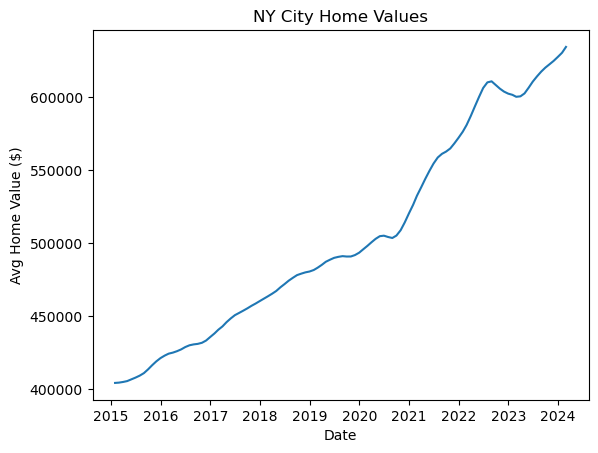

In [28]:
# Sample visualizations for testing
plt.xlabel('Date')
plt.ylabel('Avg Home Value ($)')
plt.title("NY City Home Values")
plt.plot(ct_home_values['Date'], ct_home_values['New York, NY'], label = "NY City Home Values")

In [31]:
## JUST FOR FUN : MUST DELETE CELL ##
# Sample visualizations for testing (2)


# plt.figure(figsize=(10, 6))
# for column in ct_home_values.columns:
#     if column != 'Date':
#         plt.plot(ct_home_values['Date'], ct_home_values[column], label=column)

# plt.xlabel('Date') 
# plt.ylabel('Avg Home Values') 
# plt.title('Rainbow Spaghetti') 
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
# plt.grid(True)  
# plt.xticks(rotation=45)  
# plt.tight_layout()  # Adjust layout
# plt.show()

In [9]:
monthly_rent_cost_df

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,1222.812612,1229.429362,1238.357997,1248.124841,1257.719145,...,1929.392979,1940.148040,1950.429864,1956.817952,1959.637051,1957.492248,1952.662296,1949.134829,1951.634262,1959.463118
1,394913,1,"New York, NY",msa,NY,2286.918320,2302.474952,2320.281130,2342.178321,2357.484576,...,3125.374816,3160.825434,3184.772858,3194.014302,3192.632224,3176.400731,3153.898284,3135.745100,3139.300481,3157.645790
2,753899,2,"Los Angeles, CA",msa,CA,1833.212831,1845.583162,1860.398826,1873.769750,1888.094972,...,2862.809312,2873.342312,2887.097666,2899.646080,2903.100905,2899.232441,2886.099682,2876.529804,2880.165656,2891.257496
3,394463,3,"Chicago, IL",msa,IL,1418.891001,1426.111814,1436.760649,1446.453042,1457.827846,...,1940.668194,1960.576549,1973.190407,1980.008810,1977.675067,1969.879431,1962.119747,1965.432725,1976.667954,1991.389194
4,394514,4,"Dallas, TX",msa,TX,1104.552997,1110.027098,1118.098082,1128.968868,1138.909149,...,1762.258214,1769.724573,1778.546431,1780.568827,1776.999894,1770.138678,1763.914975,1755.226482,1750.307716,1747.337141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1025.000000
596,394718,892,"Jamestown, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,855.207895,853.670476,856.643141,846.806340,868.715792,870.596648,865.348354,NaN,849.127063,857.600000
597,394996,915,"Portales, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,883.593549,876.554319,877.850408,863.481683,871.819180,852.626879,888.389623,892.327412,894.802245,875.238095
598,786253,921,"Brownsville, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300.000000
